# Análisis Exploratorio y Preprocesamiento de Datos (Pipeline)
## Student Stress Monitoring Dataset

Este notebook implementa un pipeline de preprocesamiento siguiendo **estrictamente**
los métodos y fórmulas vistas en la materia de **Reconocimiento de Patrones**:

1. Descripción de datos
2. Tratamiento de datos incompletos
3. Eliminación de puntos extremos
4. Normalización y discretización (según fórmulas teóricas)


In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
import kagglehub
import os
from kagglehub import KaggleDatasetAdapter
import glob

c:\Users\frida\AppData\Local\pypoetry\Cache\virtualenvs\recocimiento_de_patrones-H2B1DW3a-py3.12\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

# Descargar dataset
path = kagglehub.dataset_download(
    "mdsultanulislamovi/student-stress-monitoring-datasets"
)

print("Path to dataset files:", path)


csv_files = glob.glob(path + "/**/*.csv", recursive=True)
print(csv_files)

df = pd.read_csv(csv_files[0])
df.head()



Path to dataset files: C:\Users\frida\.cache\kagglehub\datasets\mdsultanulislamovi\student-stress-monitoring-datasets\versions\1
['C:\\Users\\frida\\.cache\\kagglehub\\datasets\\mdsultanulislamovi\\student-stress-monitoring-datasets\\versions\\1\\StressLevelDataset.csv', 'C:\\Users\\frida\\.cache\\kagglehub\\datasets\\mdsultanulislamovi\\student-stress-monitoring-datasets\\versions\\1\\Stress_Dataset.csv']


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


## 1. Descripción de los datos

In [4]:
# Dimensión del dataset
print(f"Filas: {df.shape[0]}")
print(f"Columnas: {df.shape[1]}")

# Información general
df.info()

Filas: 1100
Columnas: 21
<class 'pandas.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load         

In [5]:
# Estadísticas descriptivas (datos numéricos)
# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Mostrar describe de 4 en 4
for i in range(0, len(num_cols), 4):
    print(f"\nColumnas {i+1} a {min(i+4, len(num_cols))}")
    display(df[num_cols[i:i+4]].describe())



Columnas 1 a 4


,anxiety_level,self_esteem,mental_health_history,depression
count,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455
std,6.117558,8.944599,0.500175,7.727008
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000
50%,11.000000,19.000000,0.000000,12.000000
75%,16.000000,26.000000,1.000000,19.000000
max,21.000000,30.000000,1.000000,27.000000



Columnas 5 a 8


,headache,blood_pressure,sleep_quality,breathing_problem
count,1100.000000,1100.000000,1100.000000,1100.000000
mean,2.508182,2.181818,2.660000,2.753636
std,1.409356,0.833575,1.548383,1.400713
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000
50%,3.000000,2.000000,2.500000,3.000000
75%,3.000000,3.000000,4.000000,4.000000
max,5.000000,3.000000,5.000000,5.000000



Columnas 9 a 12


,noise_level,living_conditions,safety,basic_needs
count,1100.000000,1100.000000,1100.000000,1100.000000
mean,2.649091,2.518182,2.737273,2.772727
std,1.328127,1.119208,1.406171,1.433761
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,2.000000,2.000000,3.000000
75%,3.000000,3.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000



Columnas 13 a 16


,academic_performance,study_load,teacher_student_relationship,future_career_concerns
count,1100.000000,1100.000000,1100.000000,1100.000000
mean,2.772727,2.621818,2.648182,2.649091
std,1.414594,1.315781,1.384579,1.529375
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000
75%,4.000000,3.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000



Columnas 17 a 20


,social_support,peer_pressure,extracurricular_activities,bullying
count,1100.000000,1100.000000,1100.000000,1100.000000
mean,1.881818,2.734545,2.767273,2.617273
std,1.047826,1.425265,1.417562,1.530958
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,1.000000
50%,2.000000,2.000000,2.500000,3.000000
75%,3.000000,4.000000,4.000000,4.000000
max,3.000000,5.000000,5.000000,5.000000



Columnas 21 a 21


,stress_level
count,1100.000000
mean,0.996364
std,0.821673
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [6]:
# Descripción de datos categóricos (moda y frecuencias)
categorical_cols = df.select_dtypes(include=["object", "category"]).columns

for col in categorical_cols:
    print(f"\nVariable: {col}")
    print("Moda:", df[col].mode()[0])
    print(df[col].value_counts())

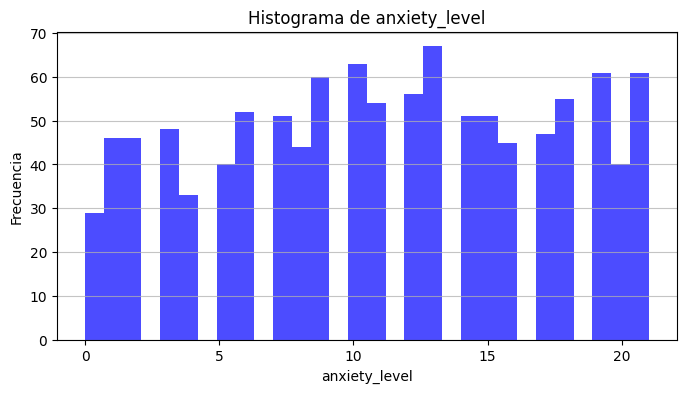

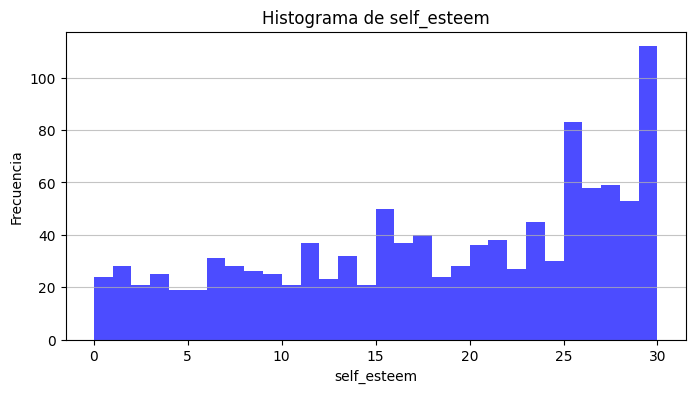

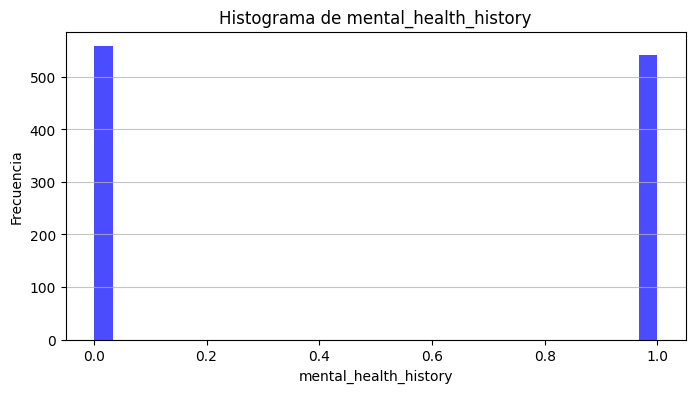

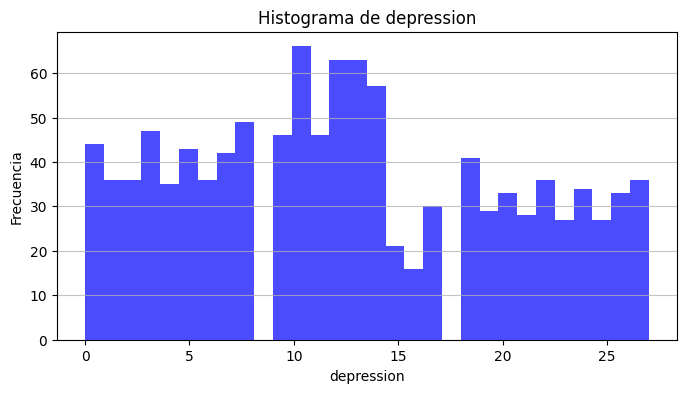

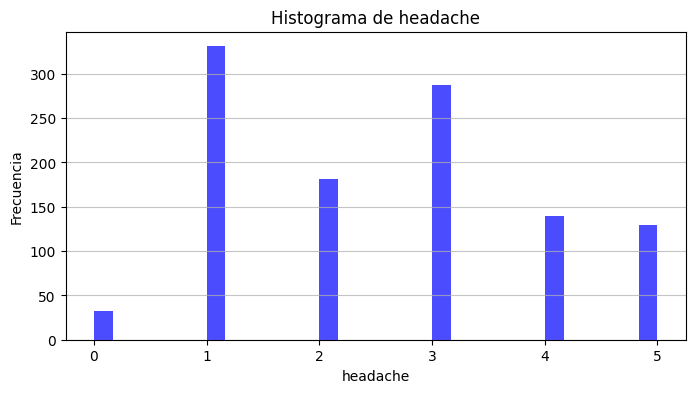

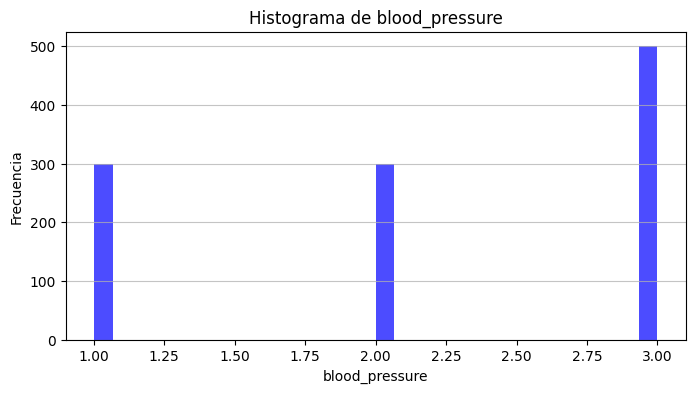

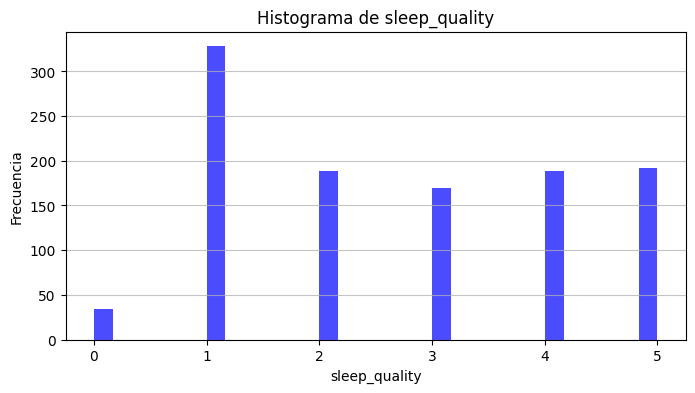

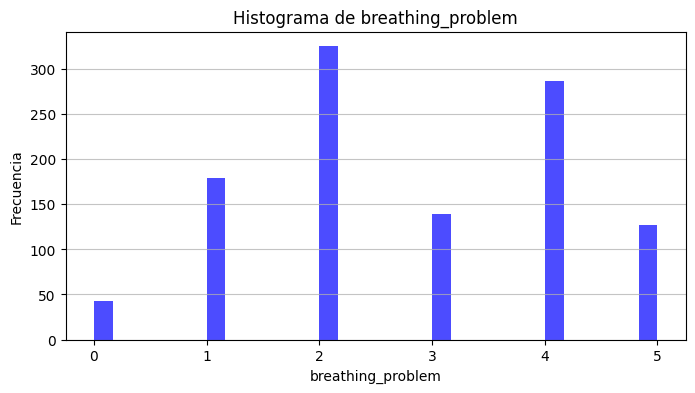

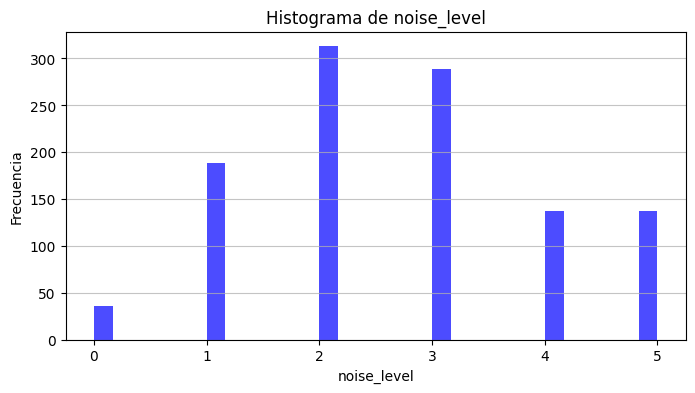

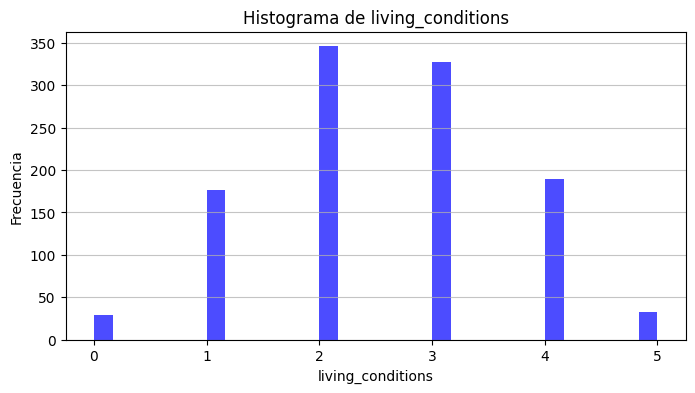

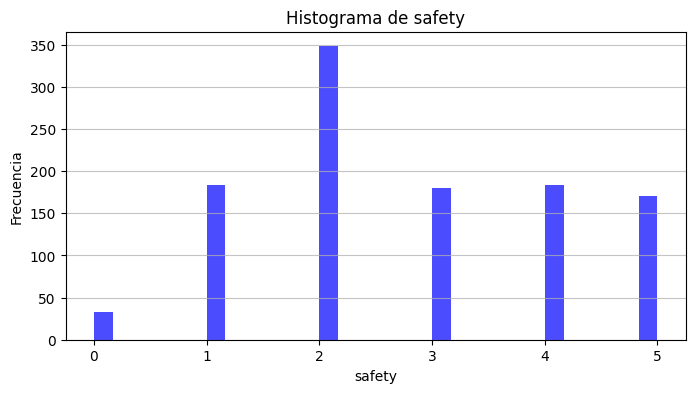

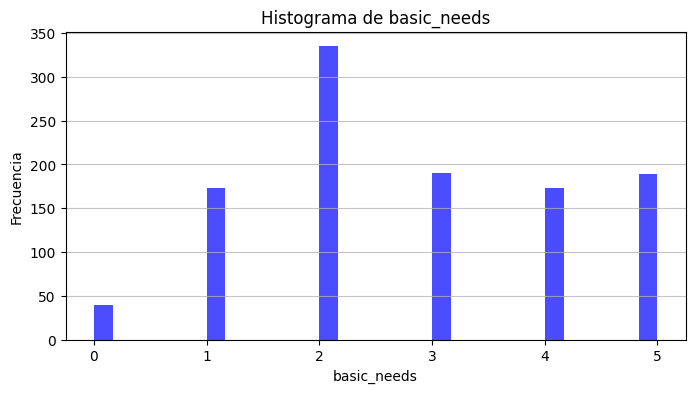

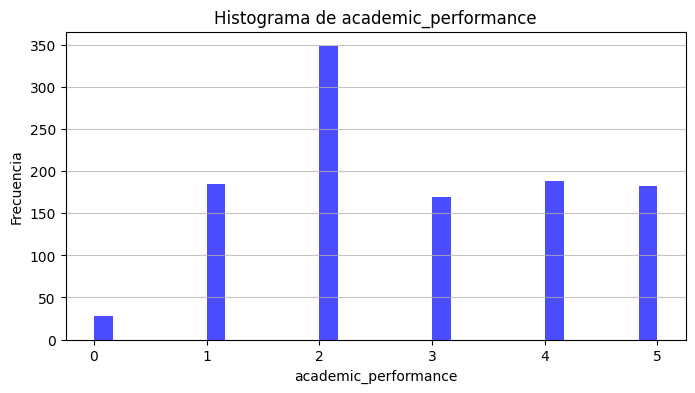

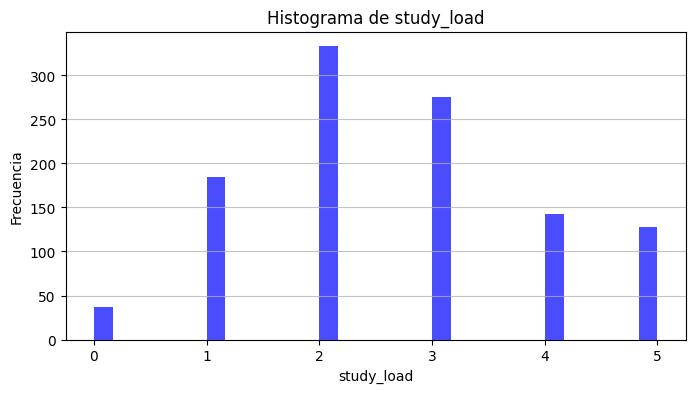

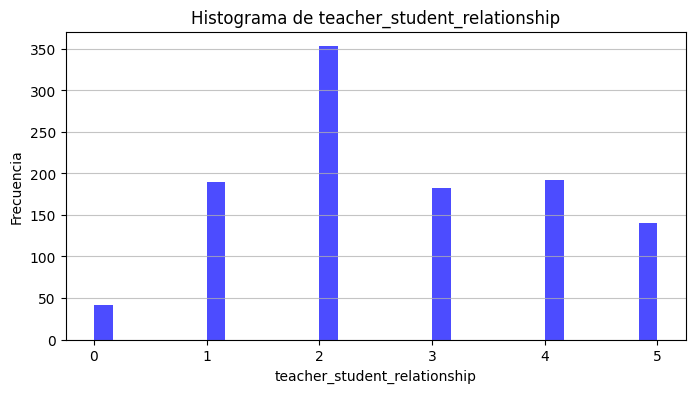

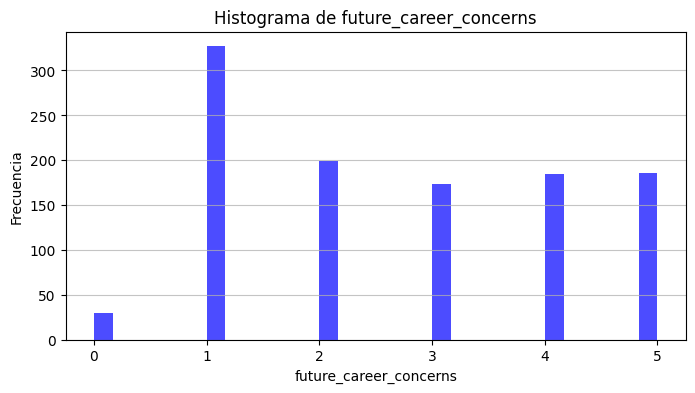

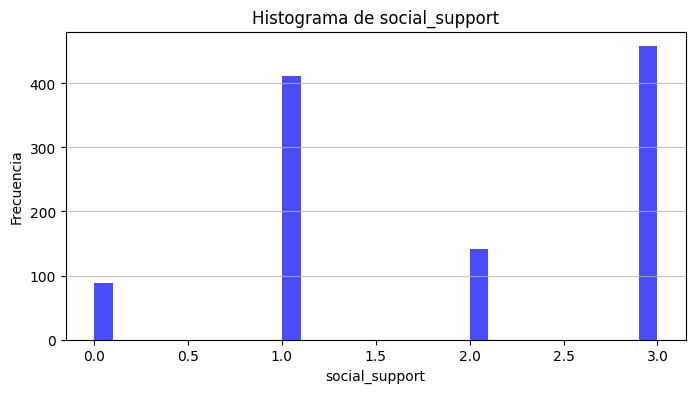

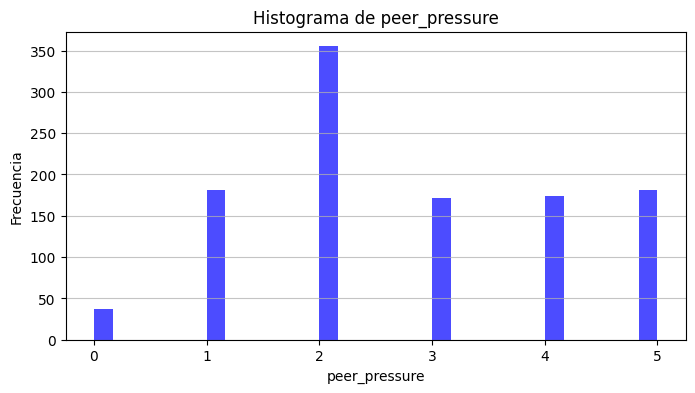

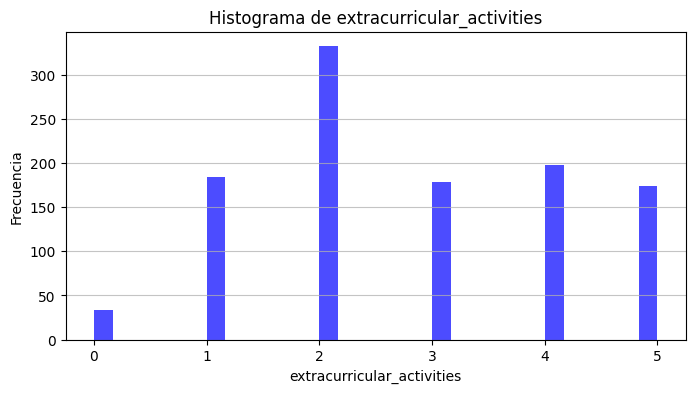

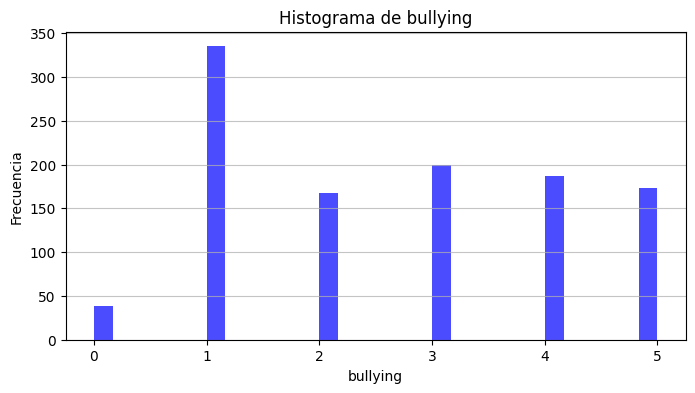

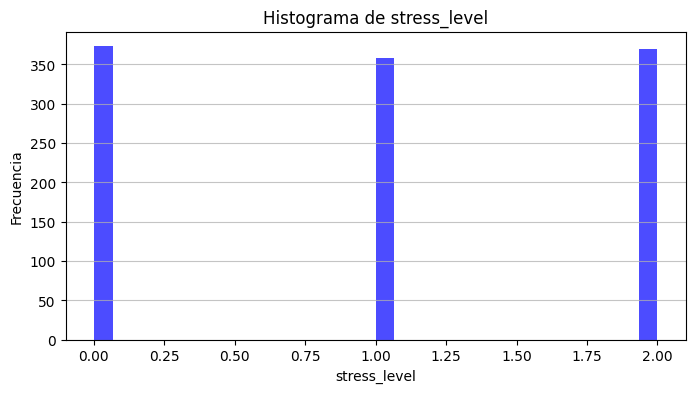

In [7]:
# histogramas para las variables numericas
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=30, color='blue', alpha=0.7)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.75)
    plt.show()



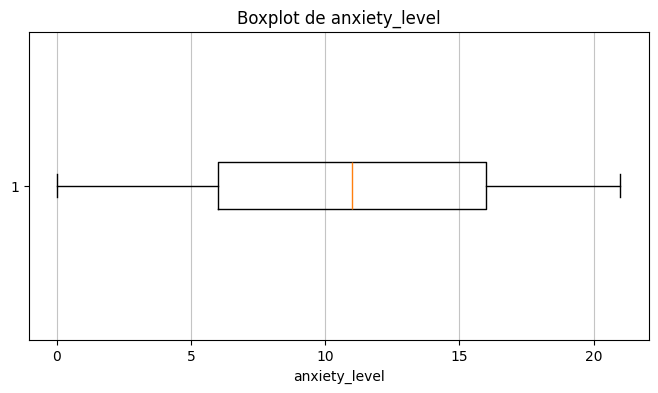

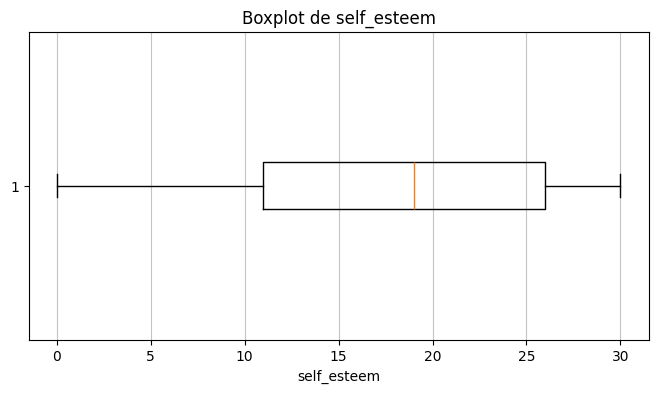

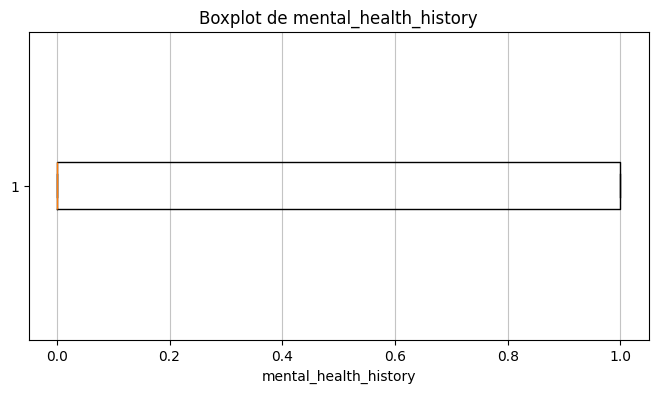

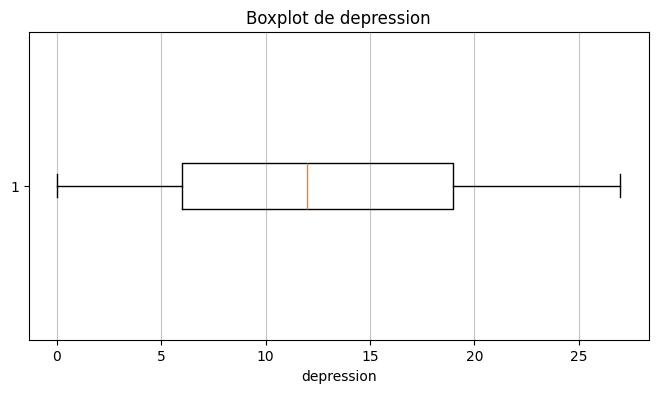

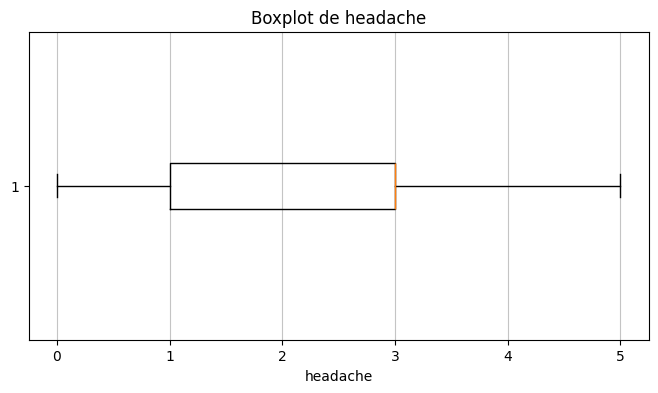

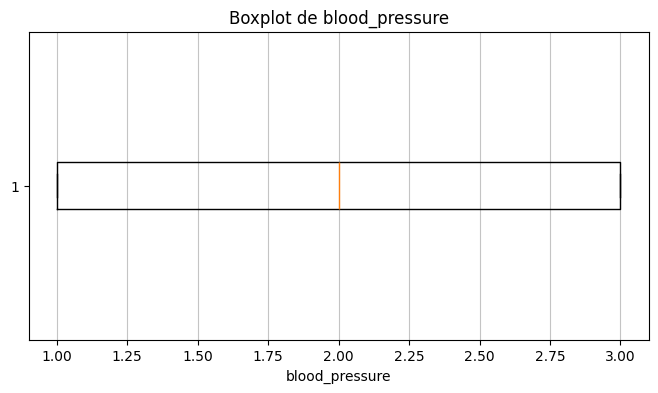

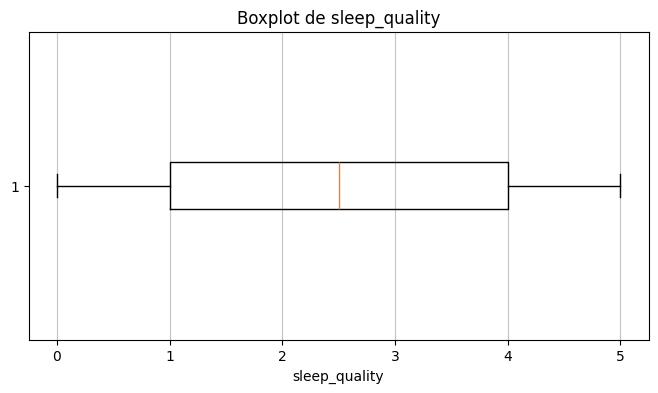

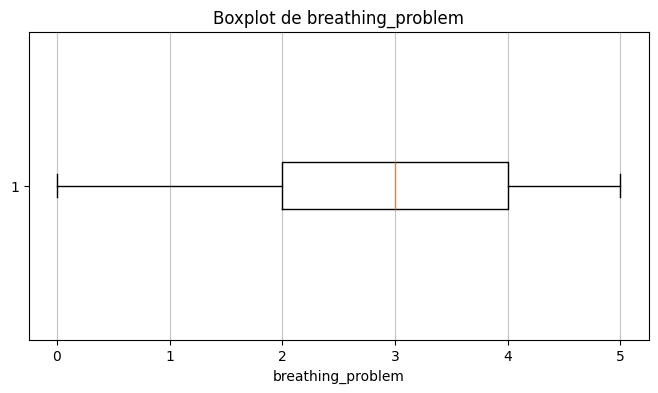

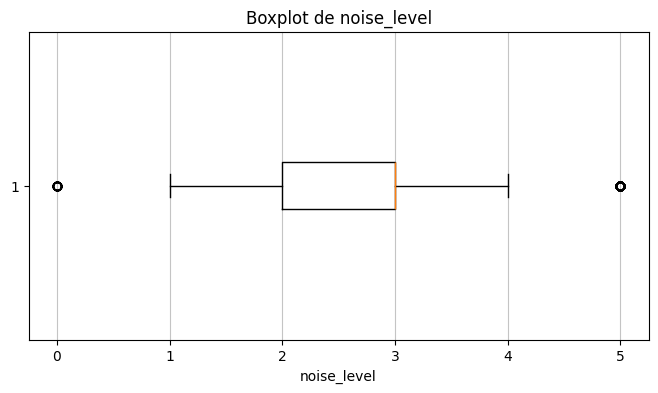

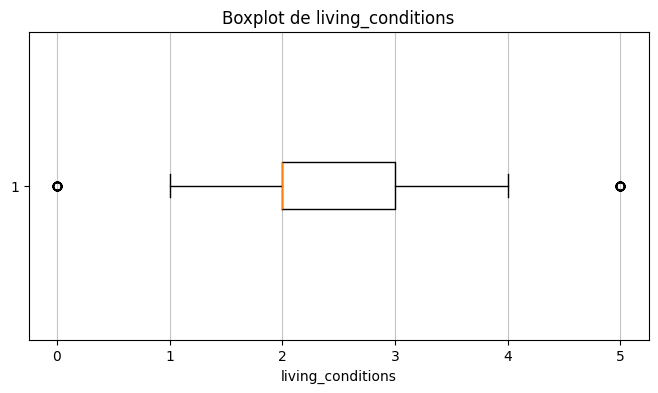

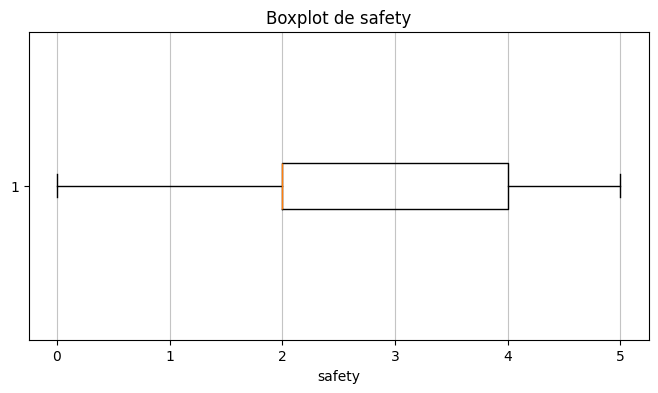

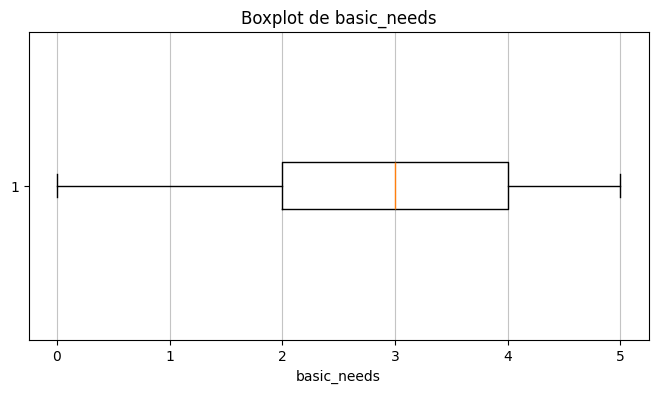

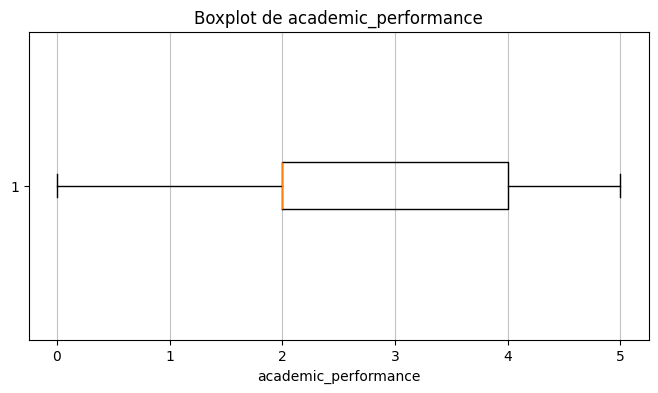

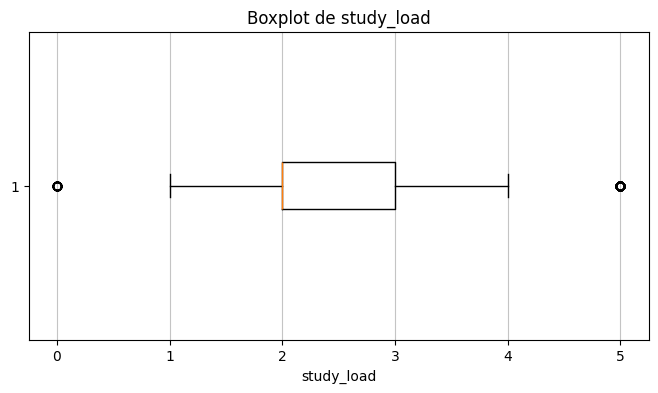

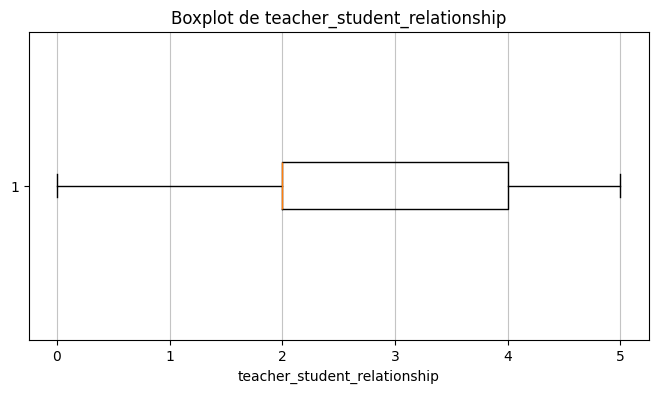

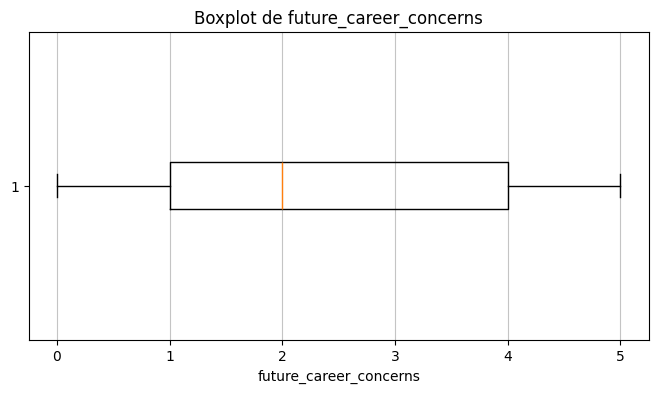

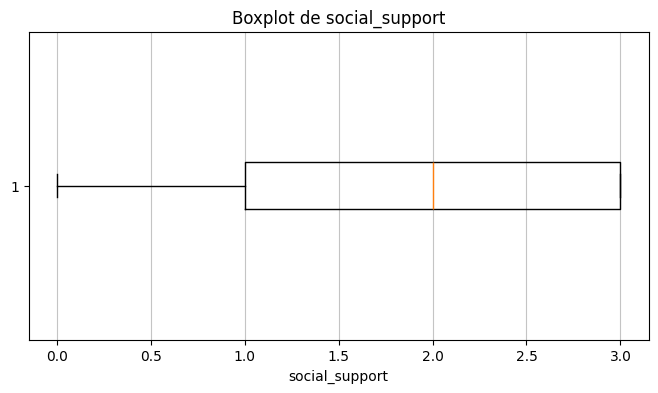

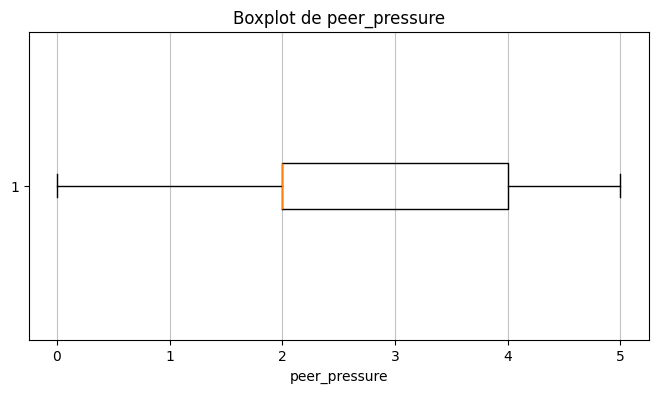

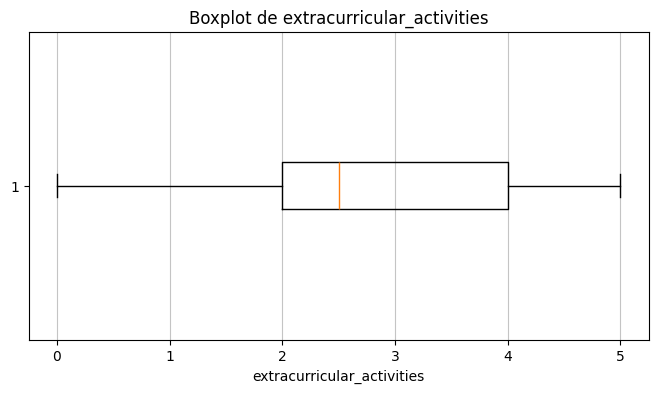

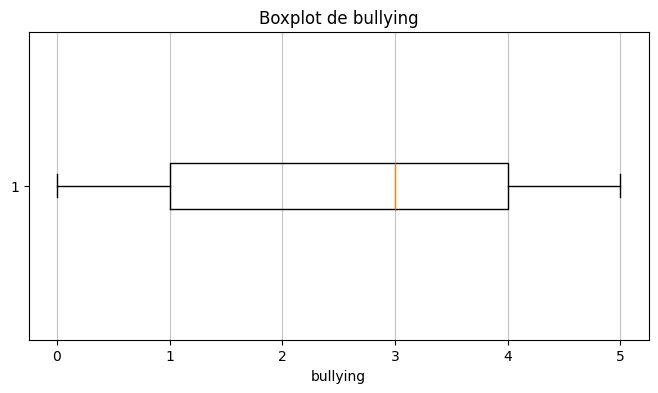

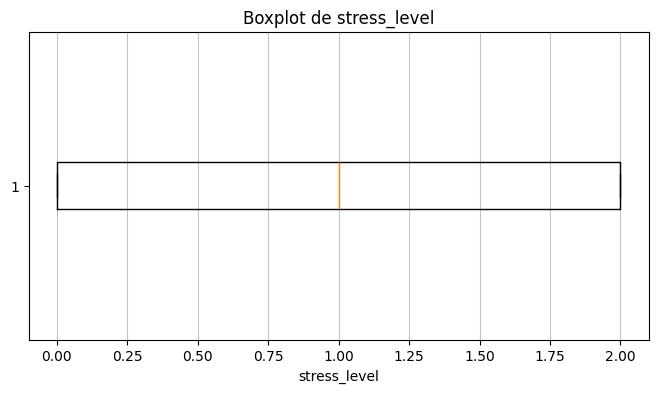

In [8]:
# boxplots para las variables numericas

for col in num_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(axis='x', alpha=0.75)
    plt.show()

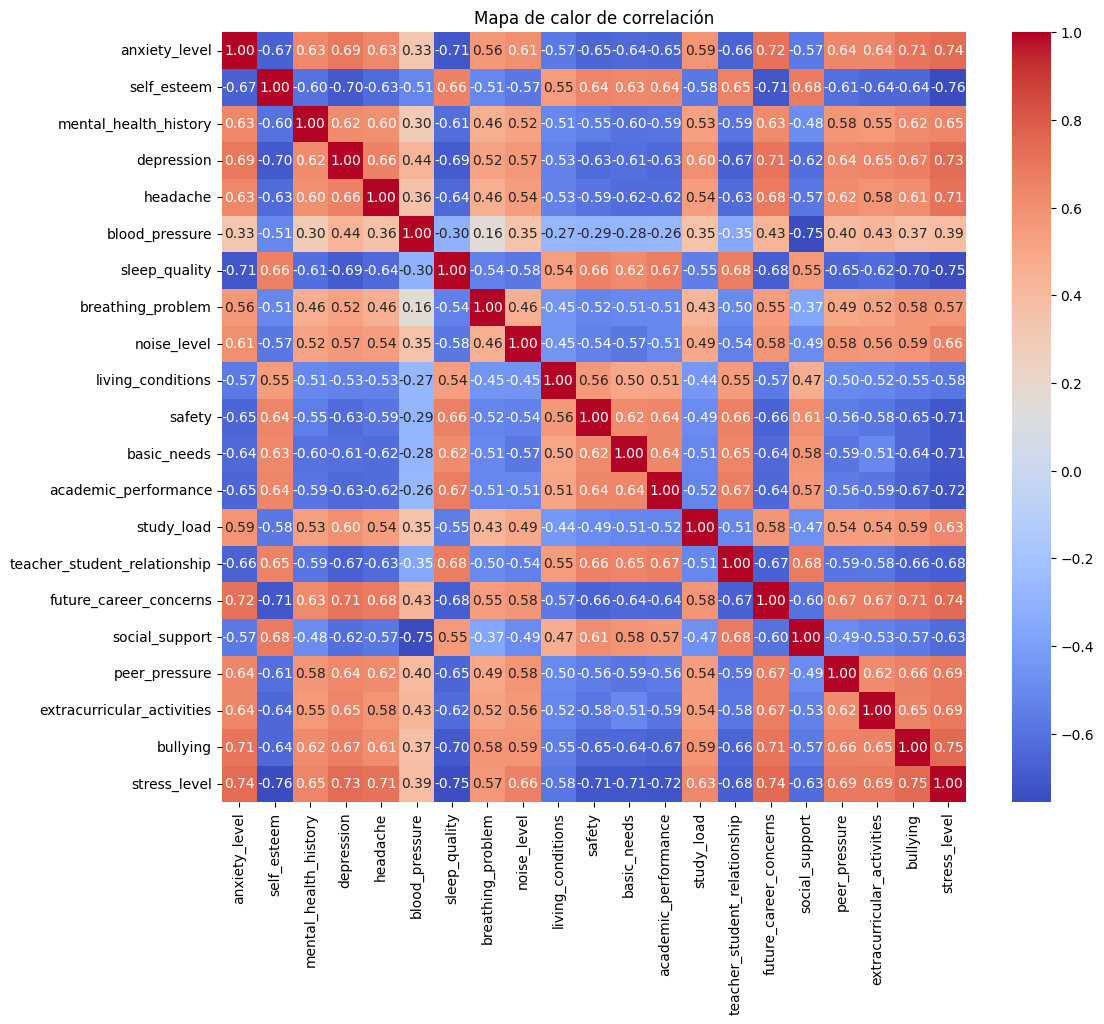

In [9]:
# Heatmap de correlación

import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de calor de correlación")
plt.show()


## 2. Tratamiento de datos incompletos

In [10]:
# Valores faltantes
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

pd.DataFrame({
    "Valores faltantes": missing,
    "Porcentaje (%)": missing_percent
})

,Valores faltantes,Porcentaje (%)
anxiety_level,0,0.0
self_esteem,0,0.0
mental_health_history,0,0.0
depression,0,0.0
headache,0,0.0
blood_pressure,0,0.0
sleep_quality,0,0.0
breathing_problem,0,0.0
noise_level,0,0.0
living_conditions,0,0.0


In [11]:
# Imputación según teoría:
# Numéricos -> media
# Categóricos -> moda

df_imputed = df.copy()

for col in df_imputed.columns:
    if df_imputed[col].dtype in ["int64", "float64"]:
        mean_val = df_imputed[col].mean()
        df_imputed[col] = df_imputed[col].fillna(mean_val)
    else:
        mode_val = df_imputed[col].mode()[0]
        df_imputed[col] = df_imputed[col].fillna(mode_val)

df_imputed.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

## 3. Eliminación de puntos extremos

In [12]:
# Eliminación de outliers usando IQR (distribución no normal)
def remove_outliers_iqr(df):
    df_out = df.copy()
    numeric_cols = df_out.select_dtypes(include=["int64", "float64"]).columns

    for col in numeric_cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df_out = df_out[(df_out[col] >= lower) & (df_out[col] <= upper)]

    return df_out

df_no_outliers = remove_outliers_iqr(df_imputed)

print("Filas originales:", df.shape[0])
print("Filas después de eliminar outliers:", df_no_outliers.shape[0])

Filas originales: 1100
Filas después de eliminar outliers: 645


## 4. Normalización y discretización

### 4.1 Normalización de datos numéricos
Se aplica normalización lineal para obtener:
media = 0 y desviación estándar = 1

Fórmula:
$$\hat{x}_{ik} = \frac{x_{ik} - \bar{x}_k}{\sigma_k}$$

In [13]:
# Normalización Z-score implementada manualmente
df_normalized = df_no_outliers.copy()
numeric_cols = df_normalized.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    mean = df_normalized[col].mean()
    std = df_normalized[col].std(ddof=1)
    df_normalized[col] = (df_normalized[col] - mean) / std

df_normalized.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,1.165634,-0.432556,-0.660188,0.445443,0.121687,-0.981946,-1.061861,1.432078,-0.102902,0.111778,...,-1.164266,-0.304799,-0.111032,-0.292764,1.085919,-1.052063,1.098831,1.073958,0.065898,0.681406
2,0.748412,-0.762342,1.512371,1.008797,0.121687,-0.981946,-1.061861,-0.309091,-0.102902,-1.131268,...,-1.164266,-1.134314,1.145382,-0.292764,0.110407,-1.052063,1.098831,-0.126567,0.065898,0.681406
3,1.582855,-1.751700,1.512371,1.196582,2.160346,2.266028,-1.860114,0.561493,2.401705,-1.131268,...,-1.164266,-1.134314,2.401795,-1.978770,2.061431,-2.695116,2.327161,2.274483,2.899491,2.339923
6,-0.920475,0.556801,-0.660188,-0.493481,-0.897642,0.642041,0.534644,-1.179676,-1.355206,1.354824,...,0.493464,1.354232,-1.367446,0.550239,-0.865105,0.590989,-0.129498,-0.126567,-0.878634,-0.977111
7,1.791466,-3.235737,1.512371,2.511076,2.160346,2.266028,-1.860114,2.302663,1.149401,-2.374314,...,-1.993131,-1.963829,1.145382,-1.135767,2.061431,-2.695116,2.327161,2.274483,2.899491,2.339923


Text(0.5, 1.0, 'Mapa de calor de correlación (limpio y normalizado)')

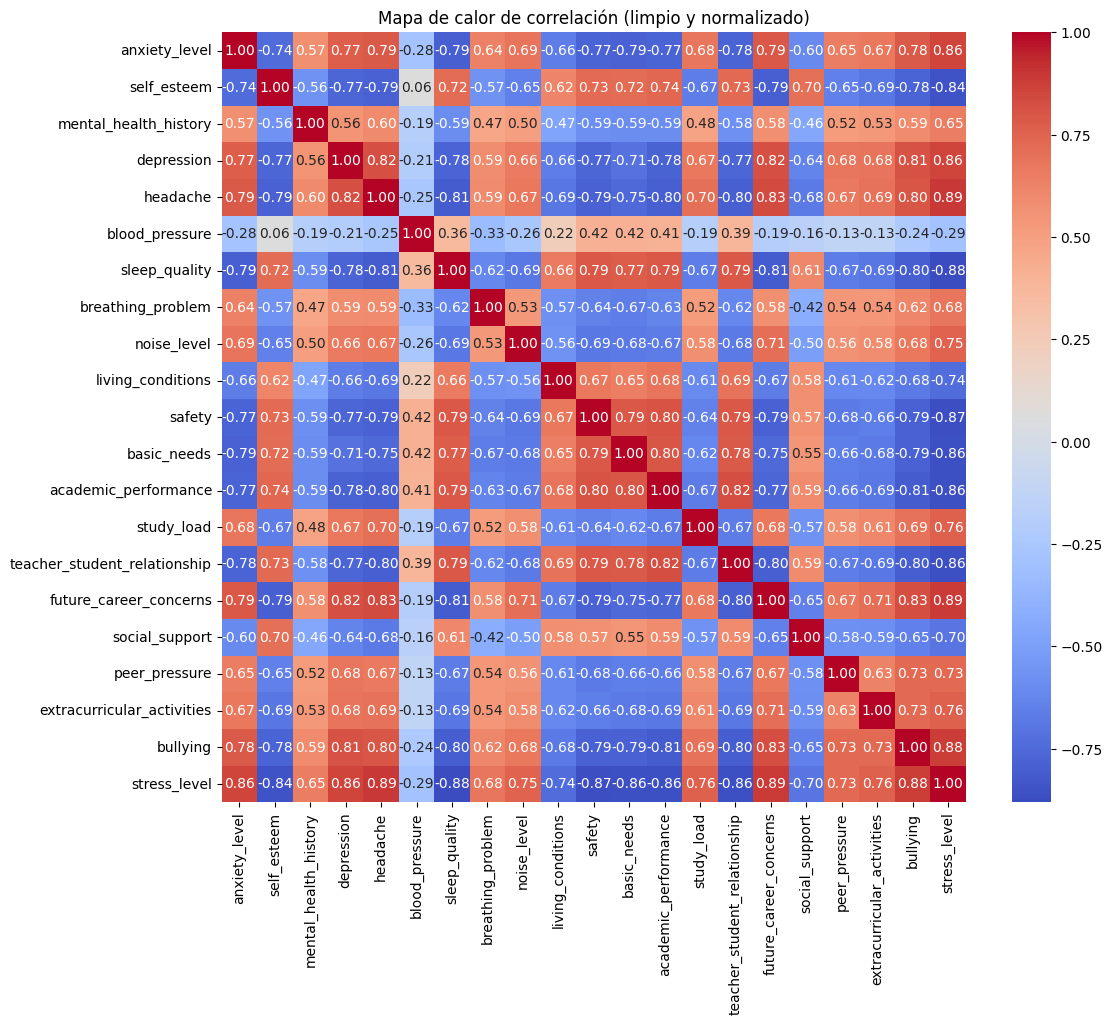

In [18]:
# Heatmap de correlación después de limpieza y normalización

plt.figure(figsize=(12, 10))
sns.heatmap(df_normalized[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de calor de correlación (limpio y normalizado)")

### 4.2 Normalización de datos categóricos
Se realiza codificación numérica respetando la naturaleza discreta
de las variables categóricas.

In [ ]:
# Codificación manual de variables categóricas
df_final = df_normalized.copy()
categorical_cols = df_final.select_dtypes(include=["object", "category"]).columns

for col in categorical_cols:
    categories = df_final[col].unique()
    mapping = {cat: idx + 1 for idx, cat in enumerate(categories)}
    df_final[col] = df_final[col].map(mapping)
    print(f"Mapeo de {col}: {mapping}")

df_final.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,1.165634,-0.432556,-0.660188,0.445443,0.121687,-0.981946,-1.061861,1.432078,-0.102902,0.111778,...,-1.164266,-0.304799,-0.111032,-0.292764,1.085919,-1.052063,1.098831,1.073958,0.065898,0.681406
2,0.748412,-0.762342,1.512371,1.008797,0.121687,-0.981946,-1.061861,-0.309091,-0.102902,-1.131268,...,-1.164266,-1.134314,1.145382,-0.292764,0.110407,-1.052063,1.098831,-0.126567,0.065898,0.681406
3,1.582855,-1.751700,1.512371,1.196582,2.160346,2.266028,-1.860114,0.561493,2.401705,-1.131268,...,-1.164266,-1.134314,2.401795,-1.978770,2.061431,-2.695116,2.327161,2.274483,2.899491,2.339923
6,-0.920475,0.556801,-0.660188,-0.493481,-0.897642,0.642041,0.534644,-1.179676,-1.355206,1.354824,...,0.493464,1.354232,-1.367446,0.550239,-0.865105,0.590989,-0.129498,-0.126567,-0.878634,-0.977111
7,1.791466,-3.235737,1.512371,2.511076,2.160346,2.266028,-1.860114,2.302663,1.149401,-2.374314,...,-1.993131,-1.963829,1.145382,-1.135767,2.061431,-2.695116,2.327161,2.274483,2.899491,2.339923


### 4.3 Discretización de igual amplitud
Se divide el rango en T intervalos:
$$ w = \frac{v_{max} - v_{min}}{T} $$

In [ ]:
# Discretización de igual amplitud (T = 3)
T = 3

df_discretized = df_final.copy()

for col in numeric_cols:
    vmin = df_discretized[col].min()
    vmax = df_discretized[col].max()
    w = (vmax - vmin) / T
    bins = [vmin + i*w for i in range(T+1)]
    df_discretized[col + "_disc"] = pd.cut(df_discretized[col], bins=bins, labels=range(1, T+1))

df_discretized.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs_disc,academic_performance_disc,study_load_disc,teacher_student_relationship_disc,future_career_concerns_disc,social_support_disc,peer_pressure_disc,extracurricular_activities_disc,bullying_disc,stress_level_disc
0,1.165634,-0.432556,-0.660188,0.445443,0.121687,-0.981946,-1.061861,1.432078,-0.102902,0.111778,...,2,2,1,2,2,2,2,2,2,2
2,0.748412,-0.762342,1.512371,1.008797,0.121687,-0.981946,-1.061861,-0.309091,-0.102902,-1.131268,...,2,1,2,2,2,2,2,1,2,2
3,1.582855,-1.751700,1.512371,1.196582,2.160346,2.266028,-1.860114,0.561493,2.401705,-1.131268,...,2,1,3,NaN,3,NaN,3,3,3,3
6,-0.920475,0.556801,-0.660188,-0.493481,-0.897642,0.642041,0.534644,-1.179676,-1.355206,1.354824,...,3,3,NaN,3,1,3,2,1,1,NaN
7,1.791466,-3.235737,1.512371,2.511076,2.160346,2.266028,-1.860114,2.302663,1.149401,-2.374314,...,1,NaN,2,1,3,NaN,3,3,3,3


In [ ]:
df_final.to_csv("student_stress_normalizado.csv", index=False)


## Conclusión
El pipeline implementa correctamente todas las fases de preprocesamiento
descritas en el material de clase:
- Descripción de datos
- Imputación de valores faltantes
- Eliminación de puntos extremos
- Normalización y discretización teórica

El dataset queda listo para algoritmos de reconocimiento de patrones.